In [1]:
from pitch import Pitch
import numpy as np

# Statsbomb

In [2]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

### Statsbomb type xg plot

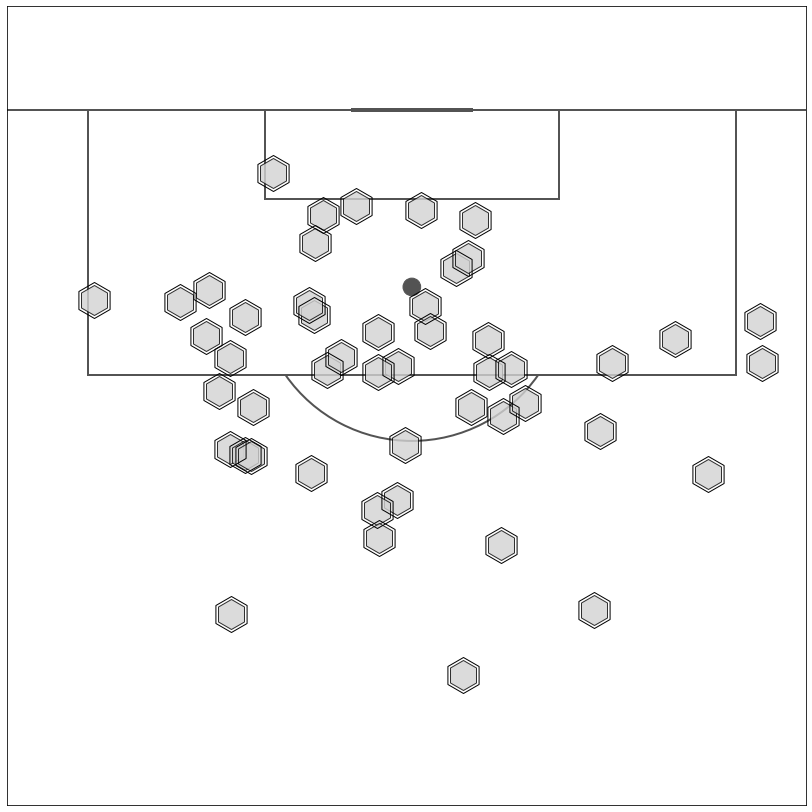

In [3]:
figsize = 820/72
pad = 1/72
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),pitch_color='white',
              line_color='#535353',figsize=(figsize,figsize),goal_type='line',axis=True,tight_layout=True,
              xpad=(-12.51,-13.25),ypad=(-12.82,7.06))
fig, ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)
pitch.scatter(x, y,marker='h', markersize=36, markerfacecolor="None",markeredgecolor='black',linestyle='None',
              linewidth=1,ax_num=0)
fig.savefig('statsbomb.png',pad_inches=pad,bbox_inches='tight')

#### Statsbomb vertical full

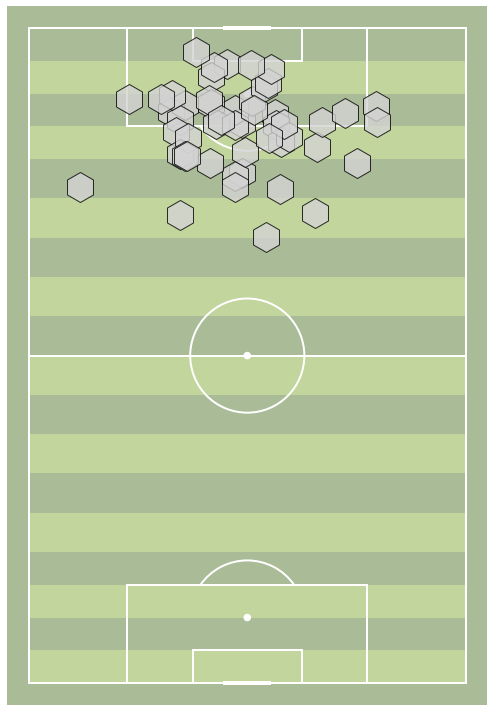

In [4]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

## Statsbomb horizontal full

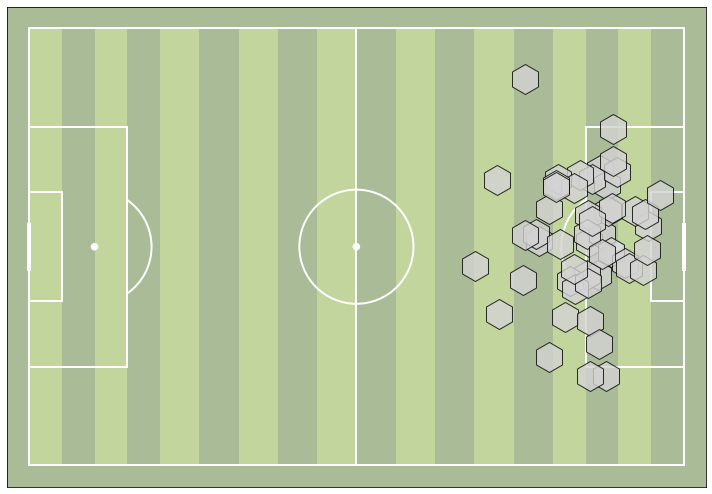

In [5]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Statsbomb Horizontal half

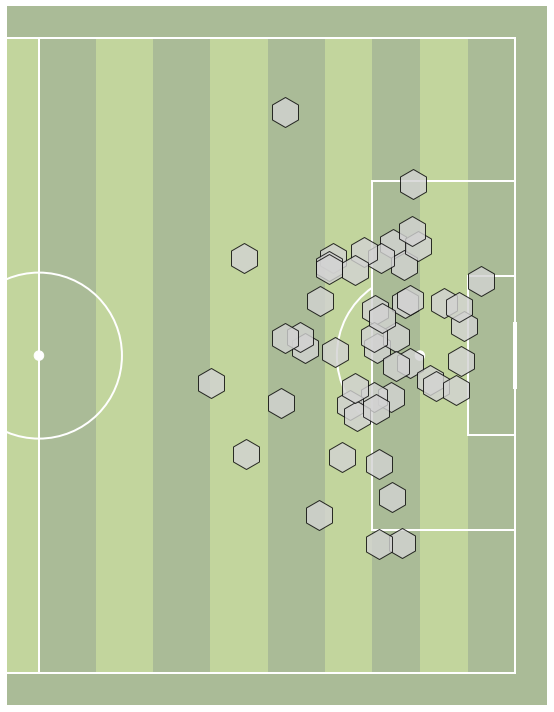

In [6]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Opta

In [7]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### Opta vertical full

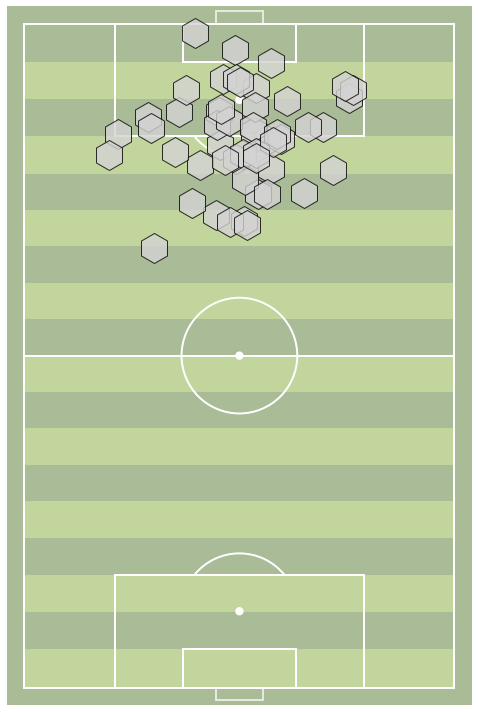

In [8]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),stripe=True,
                      goal_type='box')
fig, ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta horizontal full

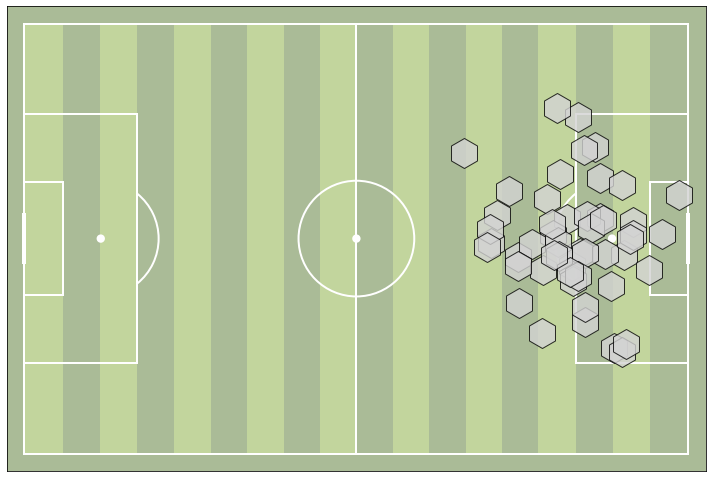

In [9]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta vertical half

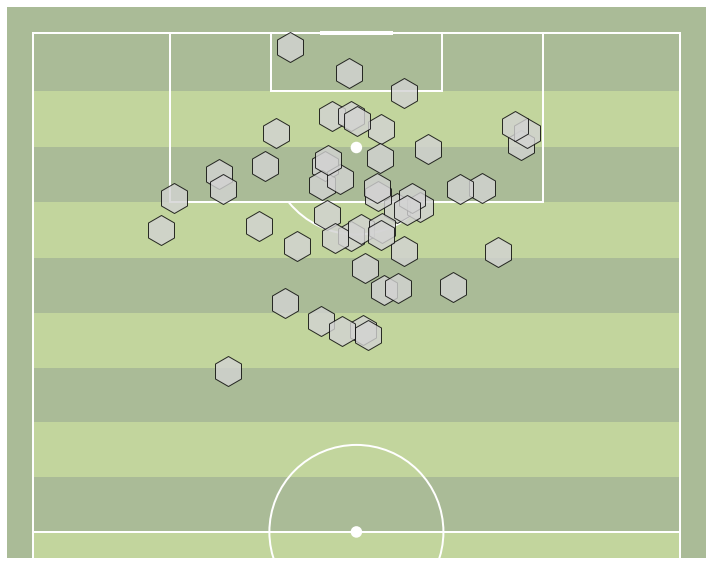

In [10]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Opta Horizontal half

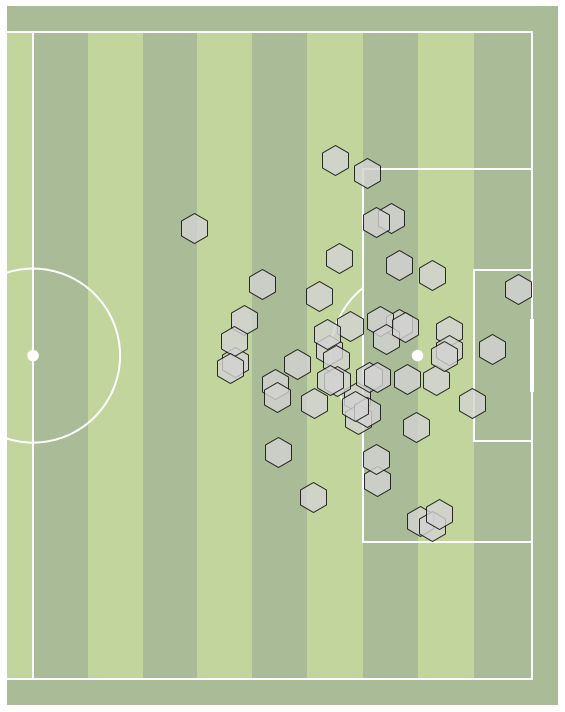

In [11]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Tracab

In [12]:
# generate data
x = np.random.normal(loc=3600, scale=700, size=50)
x[x>5250] = 4500
y = np.random.normal(loc=0, scale=1000, size=50)

#### Tracab vertical full

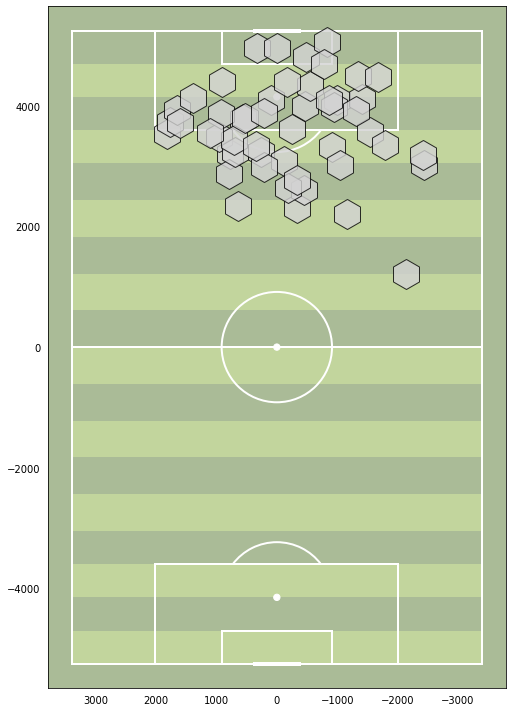

In [13]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab horizontal full

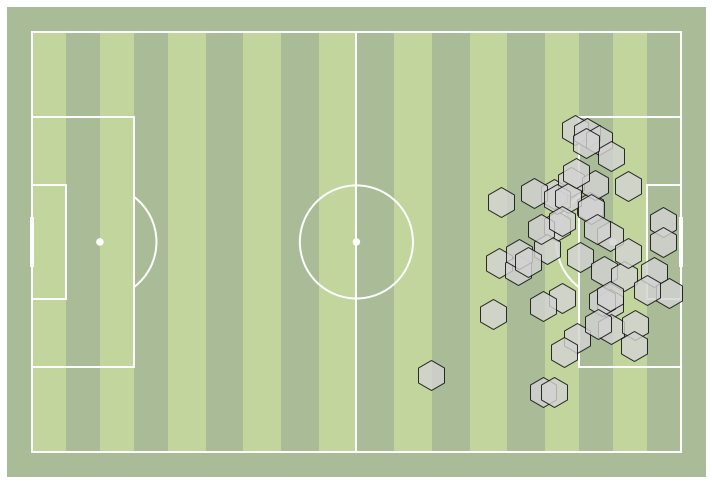

In [14]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab vertical half

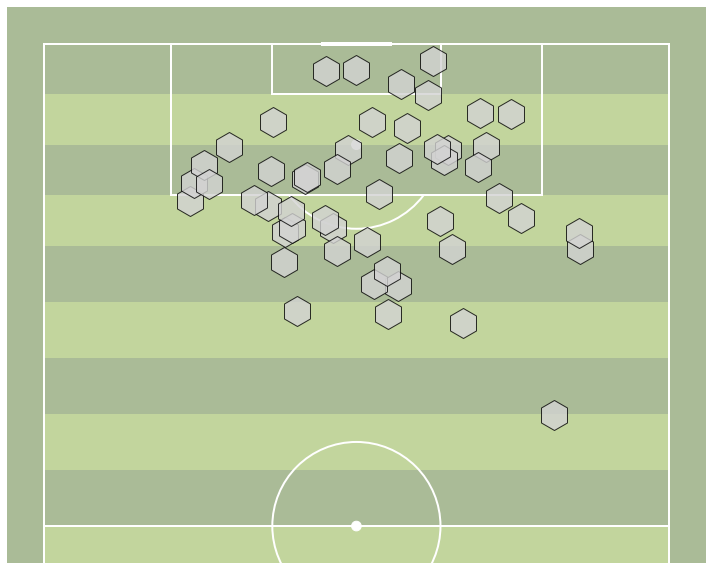

In [15]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### Tracab Horizontal half

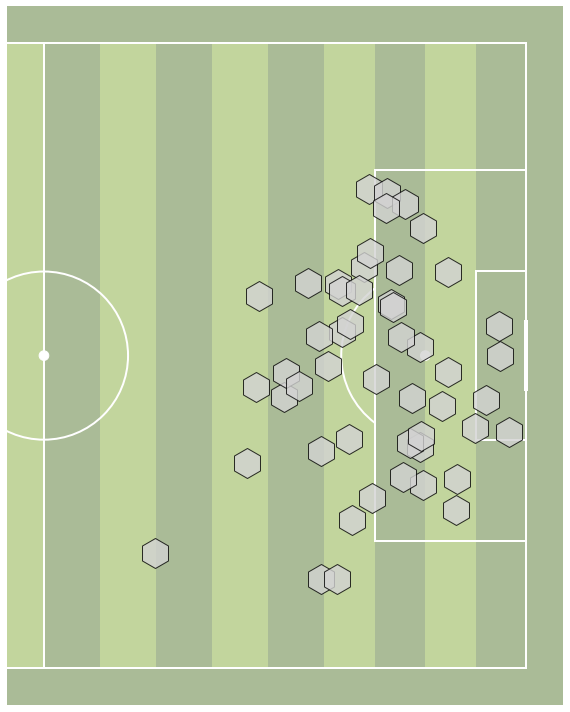

In [16]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Stats.com

In [17]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=35, scale=12, size=50)

#### stats.com vertical full

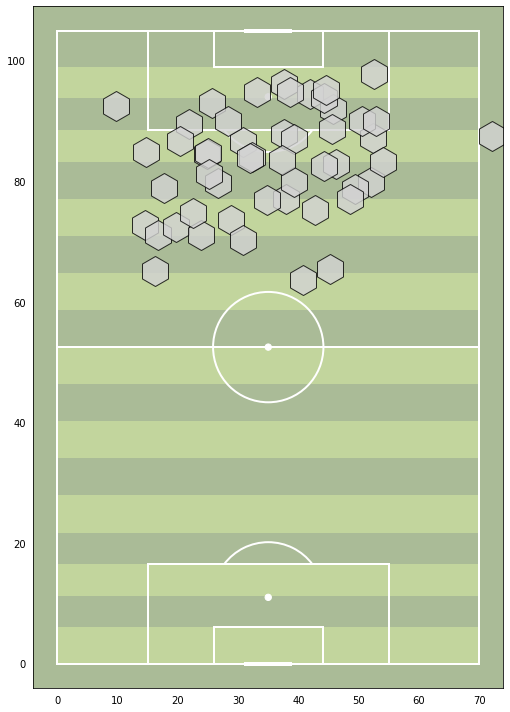

In [18]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis=True,label=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com horizontal full

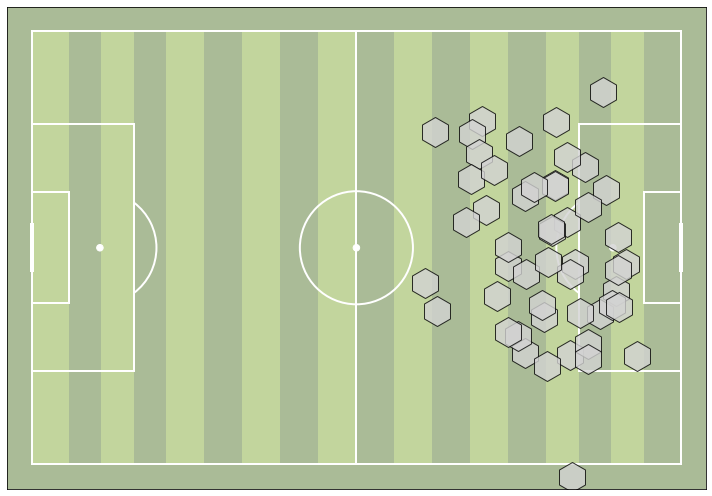

In [19]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com vertical half

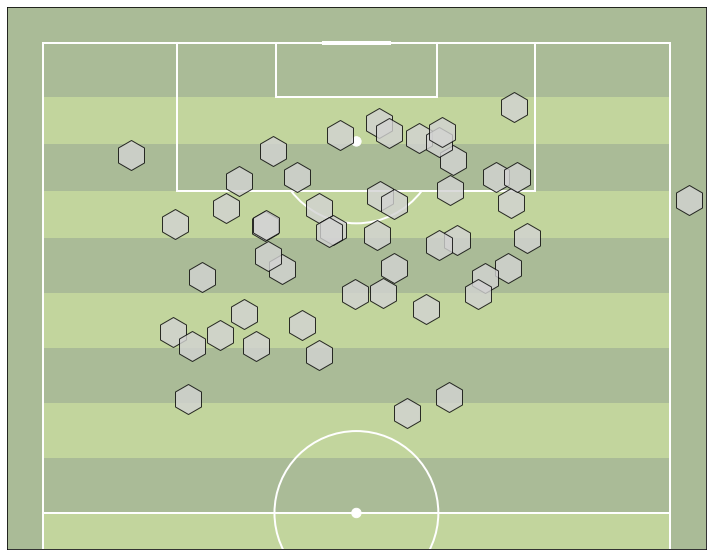

In [20]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### stats.com Horizontal half

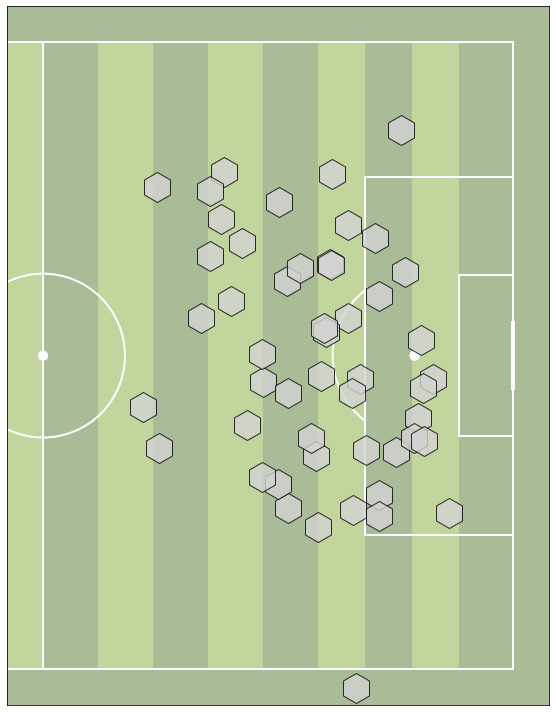

In [21]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

# Wyscout

In [22]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### wyscout vertical full

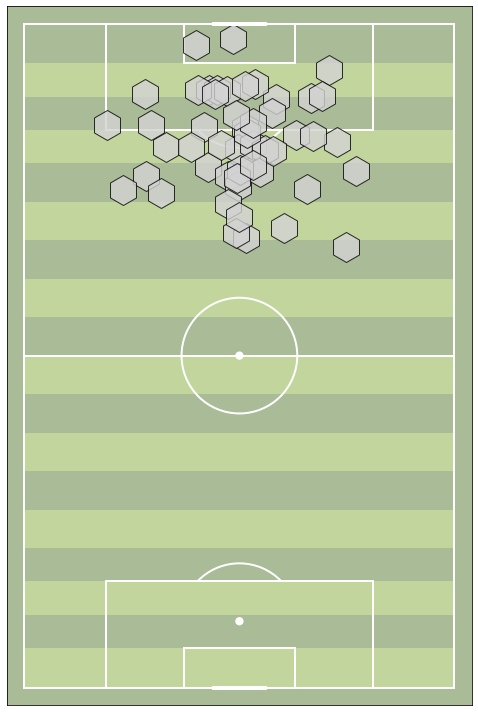

In [23]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout horizontal full

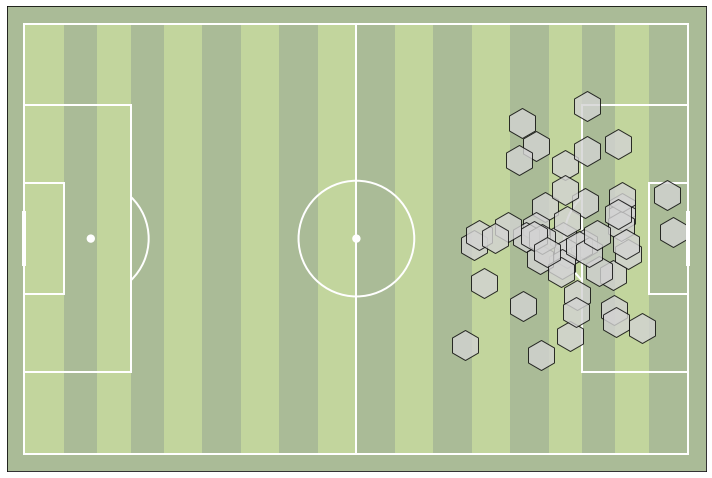

In [24]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout vertical half

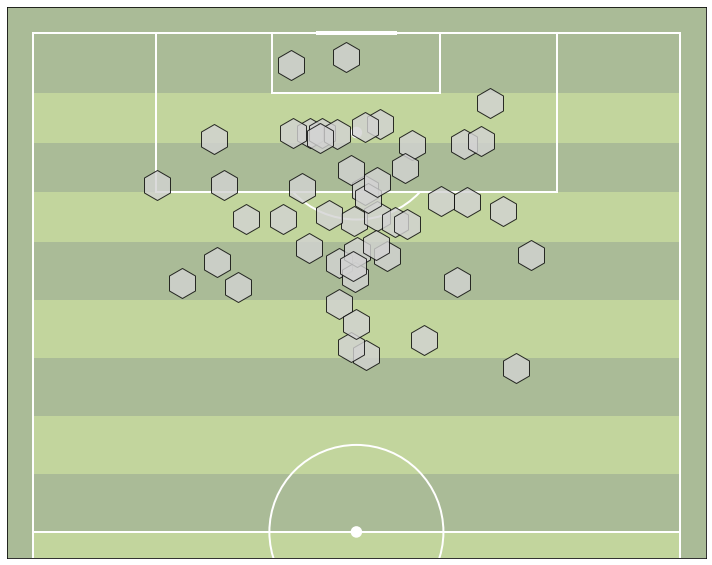

In [25]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
                     goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)

#### wyscout Horizontal half

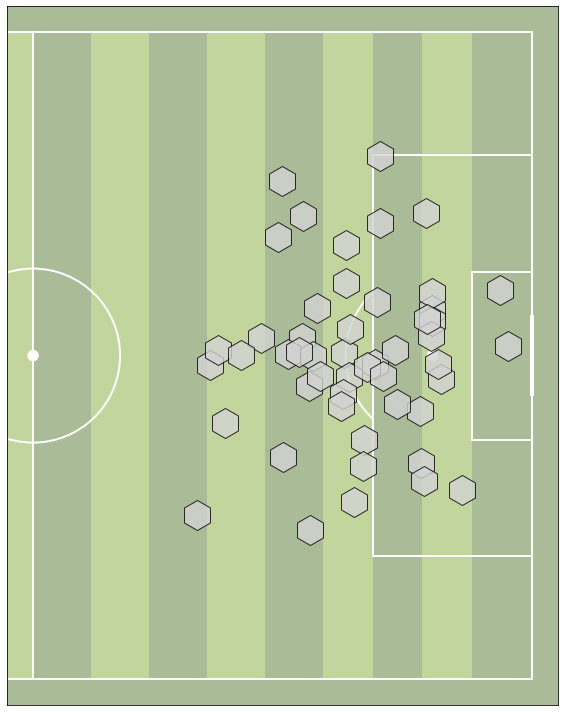

In [26]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis=True,
              goal_type='line')
ax = pitch.draw()
pitch.scatter(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax_num=0)